In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4680\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
# Load the dataset
data = pd.read_csv(r"D:\Desktop\projects\New folder\indian_retailsales_data.csv")

# Display the first few rows
print(data.head())


                               Order ID  Order Date         Region  \
0  63c3bfc2-752f-4c3f-878b-68724ae30039  2024-03-06     East India   
1  f12f47d4-95de-46d4-b3e8-71ab84f6aa01  2024-07-09  Central India   
2  79d3d628-5319-4b9b-82ef-9e06618b4972  2023-07-10     East India   
3  673031df-187d-400b-afe7-b7c8c34231c6  2024-04-29    North India   
4  9e9a4b70-46d4-48b1-9d89-153d7e0df118  2023-10-01     East India   

          City Product Category Customer Segment     Sales    Profit  \
0       Nagpur          Apparel       Individual  30814.49   6438.96   
1  Bhubaneswar            Books        Corporate  19510.79  13269.99   
2        Patna      Electronics        Corporate  32259.42    943.33   
3       Bhopal          Apparel       Individual  30621.25       NaN   
4      Chennai      Electronics       Individual  31275.92  19237.84   

   Quantity  Discount  
0        31      0.27  
1        22      0.28  
2        24      0.18  
3        28       NaN  
4        26      0.11  


In [9]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values if any
data.fillna(0, inplace=True)

# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Drop duplicates
data.drop_duplicates(inplace=True)

# Check data types
print(data.dtypes)

Order ID              0
Order Date            0
Region                0
City                  0
Product Category      0
Customer Segment      0
Sales                 0
Profit              107
Quantity              0
Discount            107
dtype: int64
Order ID                    object
Order Date          datetime64[ns]
Region                      object
City                        object
Product Category            object
Customer Segment            object
Sales                      float64
Profit                     float64
Quantity                     int64
Discount                   float64
dtype: object


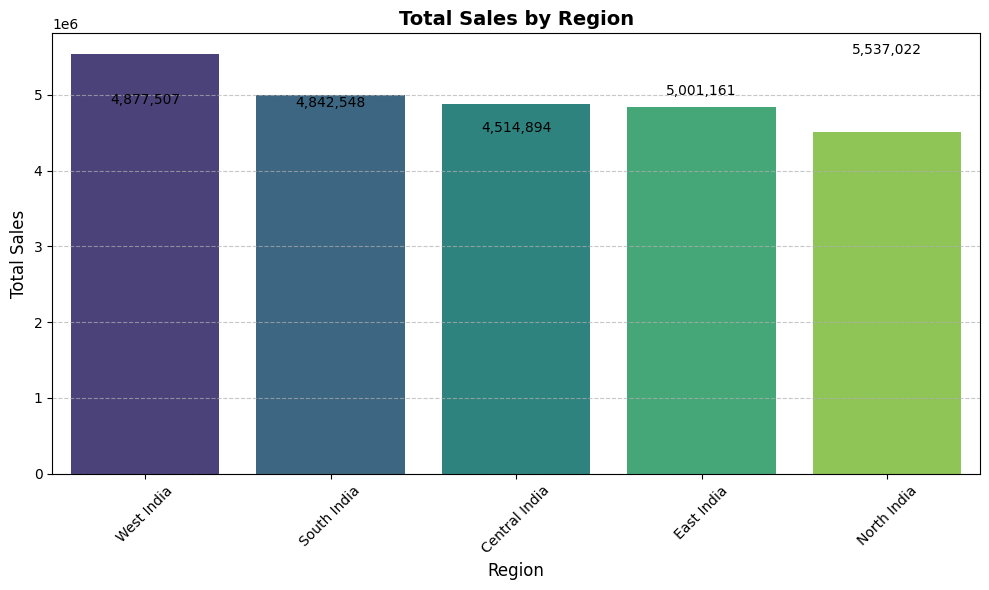

In [13]:
# 📊 Section: Total Sales by Region

# Grouping sales data by region
region_sales = data.groupby('Region')['Sales'].sum().reset_index()

# Sort regions by total sales (optional but helpful for readability)
region_sales = region_sales.sort_values('Sales', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', hue='Region', data=region_sales, palette='viridis', legend=False)

for index, row in region_sales.iterrows():
    plt.text(x=index, y=row['Sales'] + 1000, s=f"{int(row['Sales']):,}", ha='center', fontsize=10)

plt.title('Total Sales by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


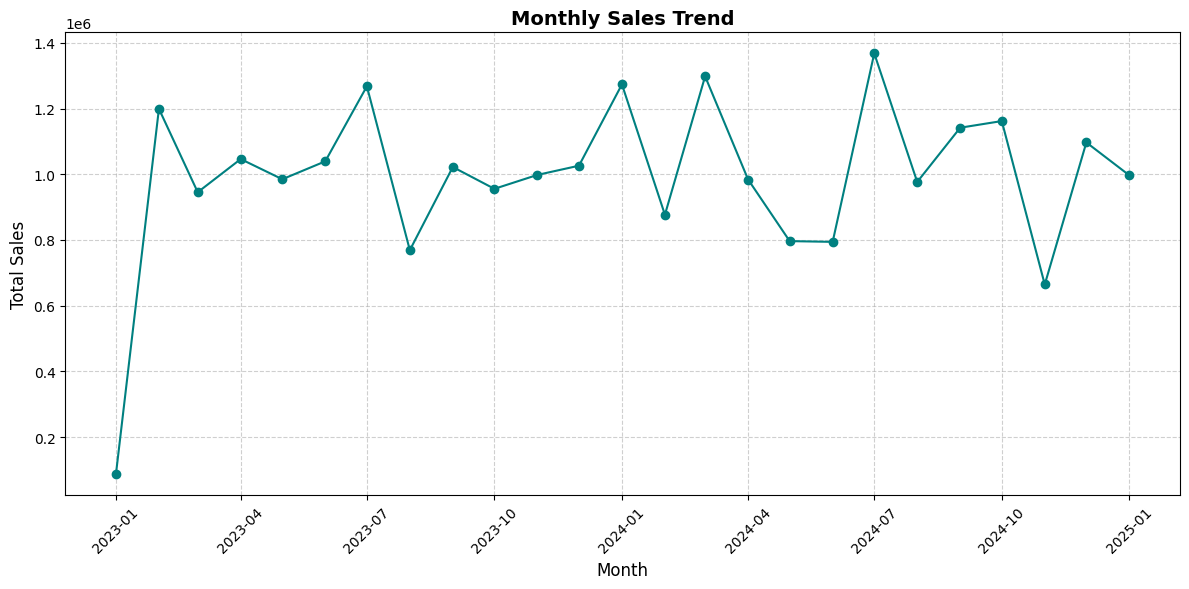

In [17]:
# 📈 Section: Monthly Sales Trend

# Convert 'Order Date' to Month period and aggregate
data['Month'] = data['Order Date'].dt.to_period('M')
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()

# Convert 'Month' to datetime for proper plotting
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o', linestyle='-', color='teal')

# Title and axis labels
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Axis formatting
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


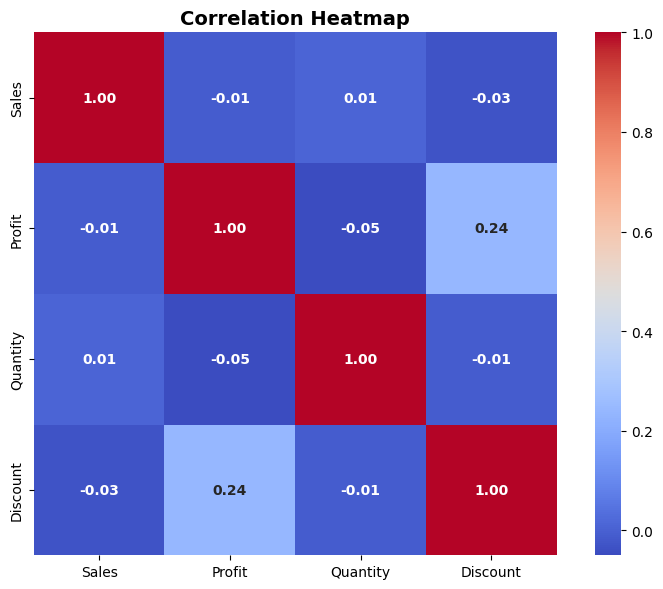

In [18]:
# 🔥 Section: Correlation Heatmap Between Sales Metrics

# Select relevant numerical columns
corr_data = data[['Sales', 'Profit', 'Quantity', 'Discount']]

# Calculate correlation matrix
corr_matrix = corr_data.corr().round(2)

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            annot_kws={"fontsize": 10, "weight": "bold"})

plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Explained Variance Ratio: [0.31202175 0.25023985]


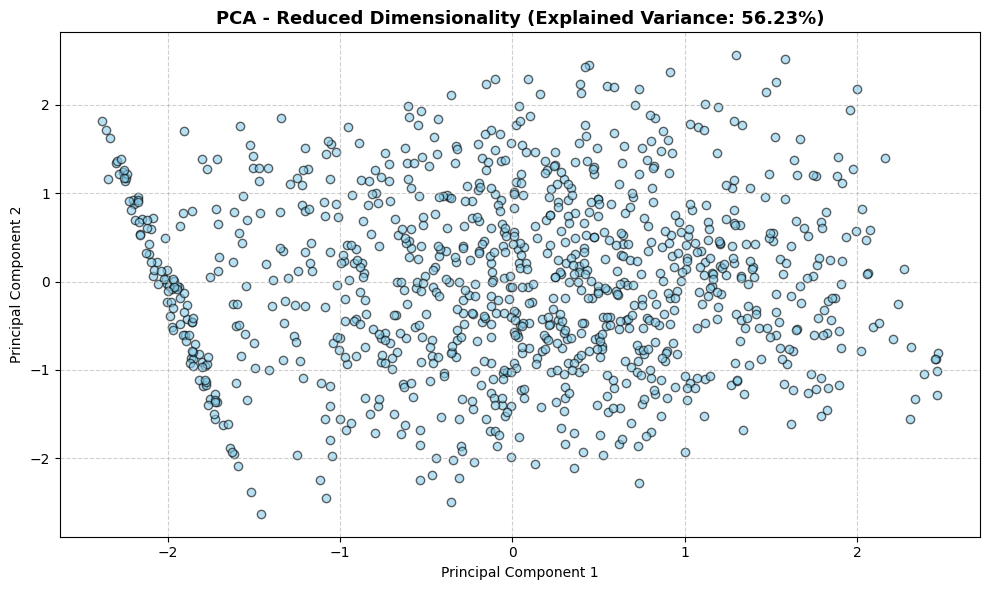

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_data = data[['Sales', 'Profit', 'Quantity', 'Discount']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Explained variance
explained_var = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_var}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.6, color='skyblue', edgecolors='black')
plt.title(f'PCA - Reduced Dimensionality (Explained Variance: {explained_var.sum():.2%})',
          fontsize=13, fontweight='bold')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = data[['Sales', 'Quantity', 'Discount']]  # Features
y = data['Profit']  # Target

# Handle missing values
X = data[['Sales', 'Profit', 'Quantity', 'Discount']].copy()
X.fillna(X.mean(), inplace=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 453.96202545475455
R² Score: 0.999988966821552


In [23]:
# Calculate Recency, Frequency, and Monetary value
today = data['Order Date'].max()
rfm = data.groupby('Customer Segment').agg({
    'Order Date': lambda x: (today - x.max()).days,  # Recency
    'Sales': 'sum',                                 # Monetary
    'Customer Segment': 'count'                    # Frequency
}).rename(columns={'Order Date': 'Recency', 'Sales': 'Monetary', 'Customer Segment': 'Frequency'})

print(rfm)

                  Recency    Monetary  Frequency
Customer Segment                                
Corporate               1  8735507.87        343
Individual              0  8570622.52        339
Retail                  1  7467004.23        318


In [24]:
product_sales = data.groupby('Product Category')['Sales'].sum().reset_index()
product_profit = data.groupby('Product Category')['Profit'].sum().reset_index()

# Merge for comparison
product_analysis = pd.merge(product_sales, product_profit, on='Product Category')
print(product_analysis)

  Product Category       Sales      Profit
0          Apparel  4805961.23  1748965.72
1            Books  4867516.51  1636431.83
2      Electronics  5157415.59  1656392.90
3        Groceries  5081358.24  1776292.57
4  Home Appliances  4860883.05  1633280.48


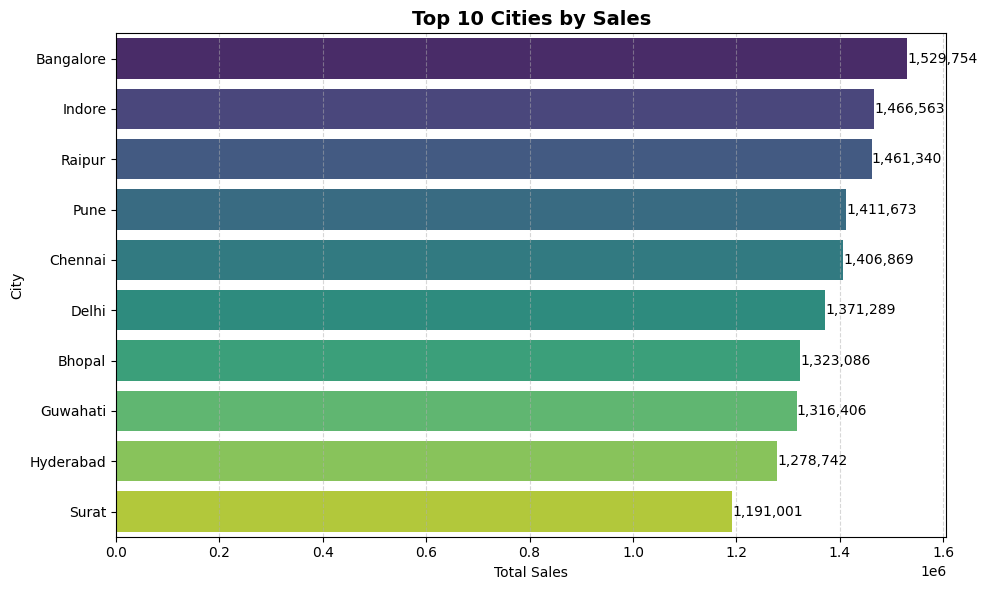

In [26]:
# Get top 10 cities by total sales
top_cities = data.groupby('City')['Sales'].sum().nlargest(10).reset_index()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='City', data=top_cities, palette='viridis', hue='City', legend=False)

# Add value labels to the bars
for index, row in top_cities.iterrows():
    plt.text(row['Sales'] + 500, index, f"{int(row['Sales']):,}", va='center', fontsize=10)

# Title and labels
plt.title('Top 10 Cities by Sales', fontsize=14, fontweight='bold')
plt.xlabel('Total Sales')
plt.ylabel('City')

# Grid and layout
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


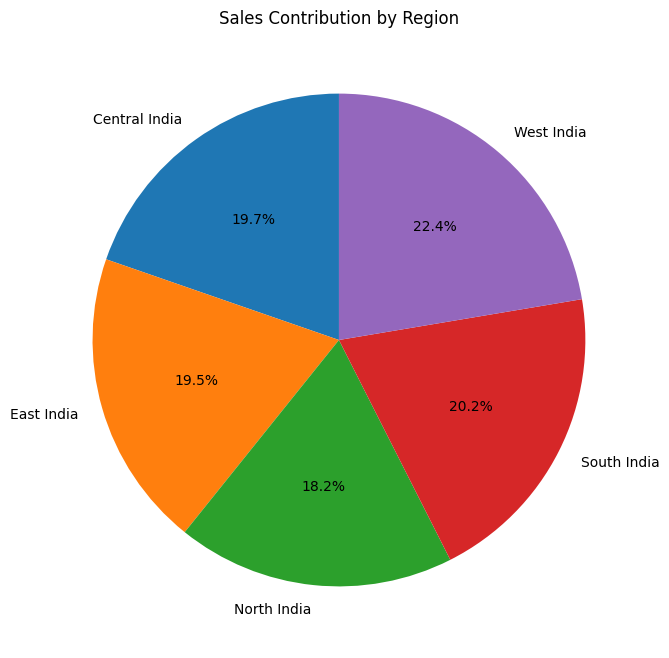

In [29]:
#Sales Contribution by Region:

region_sales = data.groupby('Region')['Sales'].sum()
region_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Sales Contribution by Region')
plt.ylabel('')  # Remove default ylabel
plt.show()

In [30]:
# Summary statistics
print(data.describe(include='all'))

                                    Order ID                  Order Date  \
count                                   1000                        1000   
unique                                  1000                         NaN   
top     63c3bfc2-752f-4c3f-878b-68724ae30039                         NaN   
freq                                       1                         NaN   
mean                                     NaN  2024-01-27 10:50:52.800000   
min                                      NaN         2023-01-28 00:00:00   
25%                                      NaN         2023-07-19 00:00:00   
50%                                      NaN         2024-01-28 00:00:00   
75%                                      NaN         2024-07-26 06:00:00   
max                                      NaN         2025-01-27 00:00:00   
std                                      NaN                         NaN   

            Region       City Product Category Customer Segment         Sales  \
count 

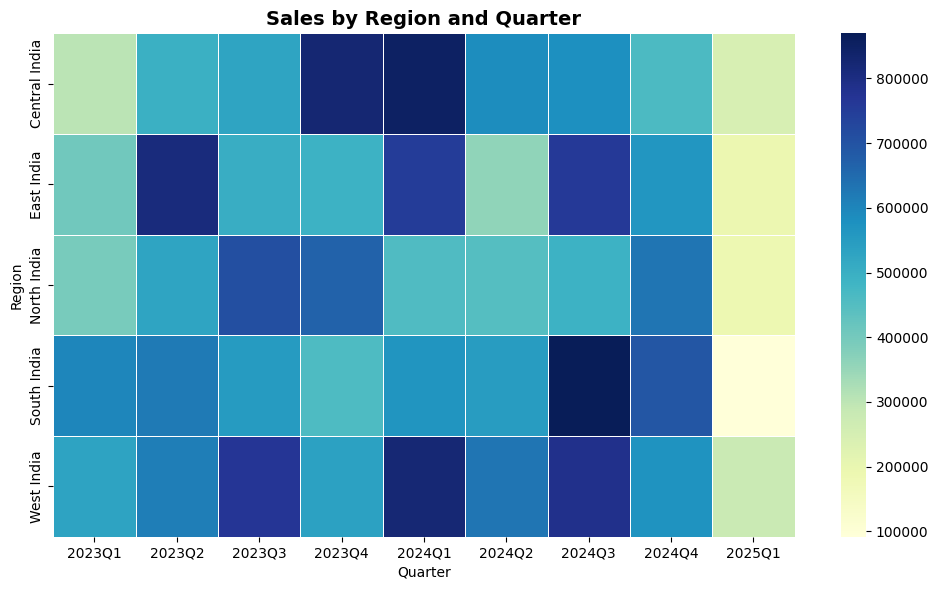

In [35]:
# 🗓️ Step 1: Create 'Quarter' column from 'Order Date'
data['Quarter'] = data['Order Date'].dt.to_period('Q')

# 📊 Step 2: Pivot Table - Region vs Quarter
pivot_table_q = data.pivot_table(index='Region', columns='Quarter', values='Sales', aggfunc='sum')

# 🎨 Step 3: Plot Heatmap without numbers
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_q, cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title('Sales by Region and Quarter', fontsize=14, fontweight='bold')
plt.xlabel('Quarter')
plt.ylabel('Region')
plt.tight_layout()
plt.show()
